In [1]:
import sys
import os

# moce two directories up and make that current directory
os.chdir("../..")
# print current directory
print(os.getcwd())

/Users/chinmayshrivastava/Documents/GitHub/RepoStateManager


In [3]:
from modules.tables.TableReader import TableReader

tr = TableReader(
    "tests/TableTransformer/FMDS0809-2018-07-Storage-of-Class-1-2-3-4-and-Plastic-Commodities-8-9.pdf",
)

100%|██████████| 1/1 [00:00<00:00,  7.53it/s]


In [5]:
tr.pdf_images[0].pixel_values

tensor([[[[2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489],
          [2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489],
          [2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489],
          ...,
          [2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489],
          [2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489],
          [2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489]],

         [[2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286],
          [2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286],
          [2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286],
          ...,
          [2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286],
          [2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286],
          [2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286]],

         [[2.6400, 2.6400, 2.6400,  ..., 2.6400, 2.6400, 2.6400],
          [2.6400, 2.6400, 2.6400,  ..., 2.6400, 2.6400, 2.6400],
          [2.6400, 2.6400, 2.6400,  ..., 2

In [7]:
o1 = tr._forward_pass_on_image(tr.pdf_images[0].pixel_values_detect)

In [8]:
o1.logits.shape

torch.Size([1, 15, 3])

In [14]:
objs = tr._outputs_to_objects(
    outputs=o1,
    img_size=tr.pdf_images[0].image.size,
    model=tr.model,
)
objs

[{'label': 'table',
  'score': 0.9996984004974365,
  'bbox': [288.0608825683594,
   666.6575927734375,
   1417.6138916015625,
   1325.9056396484375]}]

In [16]:
crops = tr._crop_table_from_image(
    image=tr.pdf_images[0].image,
    objects=objs,
)
crops

[{'image': <PIL.Image.Image image mode=RGB size=1150x679>, 'tokens': []}]

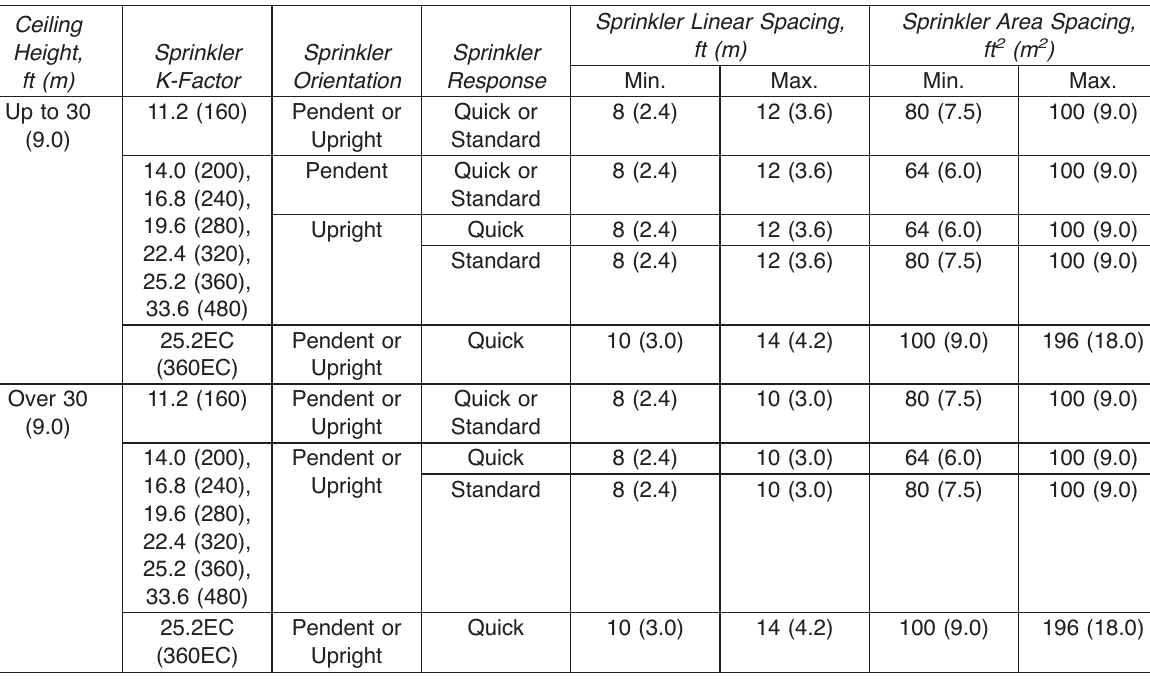

In [20]:
# print the pil image
crops[0]['image']